### Importing the Necessary Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('C:\\Users\\vimal\\Downloads\\archive\\file_out.csv')
df.head(10)

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0
5,5,716,2019-09-23,2355,406.78,101.69458,1,1.0
6,6,716,2019-09-23,2529,542.38,135.58610,1,1.0
7,7,460,2019-04-13,2361,13983.05,0.00000,460,6.0
8,8,461,2019-04-27,2723,30.00,0.00000,479,1.0
9,9,462,2019-05-30,655,2500.00,0.00000,26,1.0


# Details of DocumentID , Date , SKU
### DocumentID : Transaction ID, unique for each invoice
### Date : Date of sales
### SKU : Unique ID for each product


### Count of rows and Columns in Dataset

In [92]:
df.shape

(33356, 8)

# Count of Customers Purchased

In [331]:
print(len(df['Customer'].unique()))

606


### Number of Customers purchased is 606

##### Removing the unwanted columns in Dataset

In [93]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,716,2019-09-23,1039,381.780000,67.372540,1,1.0
1,716,2019-09-23,853,593.220000,0.000340,1,1.0
2,716,2019-09-23,862,423.730000,-0.001190,1,1.0
3,716,2019-09-23,868,201.700000,35.588140,1,1.0
4,716,2019-09-23,2313,345.760000,61.019660,1,1.0
...,...,...,...,...,...,...,...
33351,13315,2022-11-09,1849,5957.627119,1072.372881,239,4.0
33352,13316,2022-11-09,30,1271.186441,228.813559,477,2.0
33353,13317,2022-11-09,2066,1355.932203,244.067797,370,1.0
33354,13318,2022-11-09,1586,2334.745763,420.254237,356,2.0


In [94]:
df['Customer'] = df['Customer'] + 1

In [221]:
df["Date"] =  pd.to_datetime(df["Date"], format="%Y-%m-%d").dt.date

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33356 entries, 0 to 33355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DocumentID  33356 non-null  int64  
 1   Date        33356 non-null  object 
 2   SKU         33356 non-null  int64  
 3   Price       33356 non-null  float64
 4   Discount    33356 non-null  float64
 5   Customer    33356 non-null  int64  
 6   Quantity    33356 non-null  float64
 7   Total_cost  33356 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.0+ MB


In [188]:
df['Customer'] = df['Customer'].astype('str')
df['Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33356 entries, 0 to 33355
Series name: Customer
Non-Null Count  Dtype 
--------------  ----- 
33356 non-null  object
dtypes: object(1)
memory usage: 260.7+ KB


### Checking for  missing values

In [189]:
df.isna().sum()

DocumentID    0
Date          0
SKU           0
Price         0
Discount      0
Customer      0
Quantity      0
Total_cost    0
dtype: int64

#### From this now we found that There is no missing data for this dataset
#### If it cotains missing values we can fill those missing null values with mean or median

## Mean - When missing data column in uniform or normally distributed

## Median - When missing data column is not normally distributed (right or left skewed)



In [190]:
df['Total_cost'] = df['Price']*df['Quantity']
df.head()

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,Total_cost
0,716,2019-09-23,1039,381.78,67.37254,2,1.0,381.78
1,716,2019-09-23,853,593.22,0.00034,2,1.0,593.22
2,716,2019-09-23,862,423.73,-0.00119,2,1.0,423.73
3,716,2019-09-23,868,201.70,35.58814,2,1.0,201.70
4,716,2019-09-23,2313,345.76,61.01966,2,1.0,345.76


In [191]:
df.head()

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,Total_cost
0,716,2019-09-23,1039,381.78,67.37254,2,1.0,381.78
1,716,2019-09-23,853,593.22,0.00034,2,1.0,593.22
2,716,2019-09-23,862,423.73,-0.00119,2,1.0,423.73
3,716,2019-09-23,868,201.70,35.58814,2,1.0,201.70
4,716,2019-09-23,2313,345.76,61.01966,2,1.0,345.76


### Statitical Summary of Data

In [214]:
df.describe()

,DocumentID,SKU,Price,Discount,Quantity,Total_cost
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,3.335600e+04
mean,8227.577227,1241.273174,2915.716875,591.249968,5.760695,9.109836e+04
std,4028.047727,893.872164,10285.512325,3508.983569,19.550559,2.769151e+06
min,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000e+00
25%,5399.750000,503.000000,661.016949,95.674576,2.000000,1.186441e+03
50%,8733.000000,1008.000000,1203.389830,195.254237,4.000000,4.108475e+03
75%,10857.000000,2078.250000,2572.194915,423.489661,4.000000,1.304237e+04
max,15751.000000,2904.000000,522767.340000,240396.660000,1246.000000,3.199336e+08


## Correlation Summary of data

In [215]:
df.corr()

,DocumentID,SKU,Price,Discount,Quantity,Total_cost
DocumentID,1.000000,-0.039742,0.150009,0.105780,0.060508,0.021977
SKU,-0.039742,1.000000,0.031754,0.005906,0.000655,-0.004559
Price,0.150009,0.031754,1.000000,0.748593,0.369511,0.622206
Discount,0.105780,0.005906,0.748593,1.000000,0.427163,0.795776
Quantity,0.060508,0.000655,0.369511,0.427163,1.000000,0.424355
Total_cost,0.021977,-0.004559,0.622206,0.795776,0.424355,1.000000


### From the Above we found that the Correlation of Price and Discount is 0.748 , Therefore there is good relationship between those two variables 

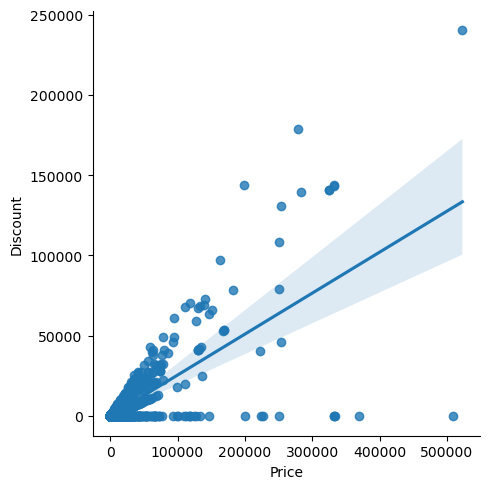

In [216]:
sns.lmplot(x='Price',y='Discount',data=df)

### From the above graph we are seeing a positive trend of relationship between Price and Discount

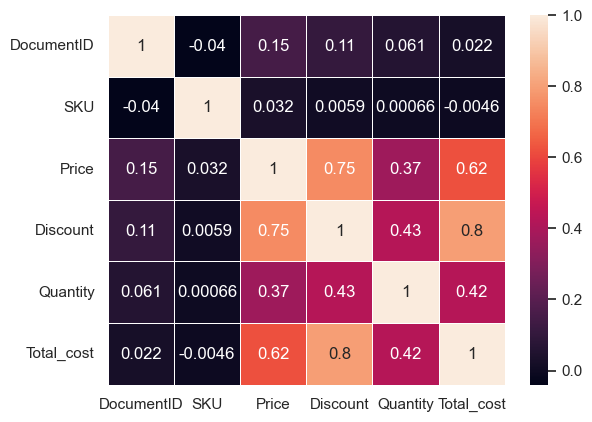

In [296]:
sns.heatmap(df.corr(),annot=True, linewidth=.5);

# Overview of Customers invested

In [192]:
customers_investment_df = df.groupby('Customer',as_index=False)[['Total_cost']].sum().sort_values(by='Total_cost')
customers_investment_df

,Customer,Total_cost
247,321,1.843220e+01
557,600,5.084746e+01
229,305,7.375424e+01
517,565,1.347458e+02
578,74,1.356000e+02
...,...,...
387,448,5.926570e+07
579,75,6.461353e+07
290,360,3.008908e+08
355,419,8.856095e+08


### Top 10 Customers with Highest spend on products

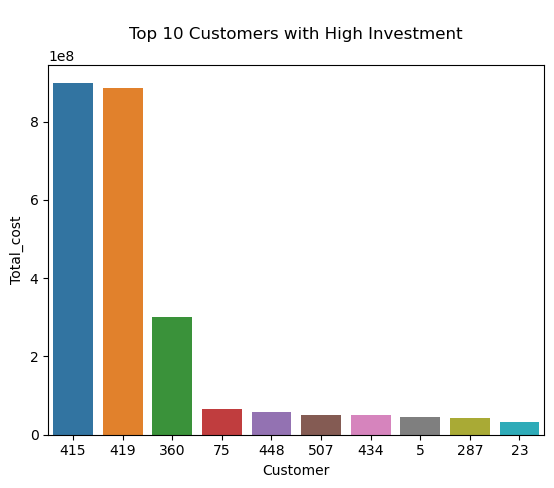

In [212]:
sns.barplot(data=(customers_investment_df.tail(10).sort_values(by='Total_cost',ascending=False)),x='Customer',y='Total_cost').set(
    title="\nTop 10 Customers with High Investment\n");

### Top 10 Customers with Lowest spend on products


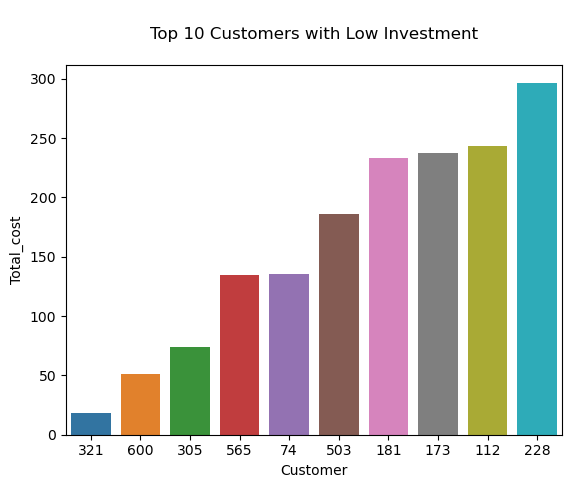

In [213]:
sns.barplot(data=customers_investment_df.head(10),x='Customer',y='Total_cost').set(
    title="\nTop 10 Customers with Low Investment\n");

## Checking for normality using Hypothesis Testing

In [313]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [314]:
# Ho : Data is normally distributed
# H1 : Data is not normally Distributed

In [319]:
stat,p = normaltest(df['Price'])
print('Stat :',stat)
print('P-Value :',p)

Stat : 77838.34669264103
P-Value : 0.0


In [320]:
## alpha = 0.05
if p > 0.05:
    print('---Accepting Null Hypothesis and Data is Normally Distributed---')
else:
    print('---Rejecting Null Hypothesis and Data is Not Normally Distributed---')

---Rejecting Null Hypothesis and Data is Not Normally Distributed---


C:\Users\vimal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


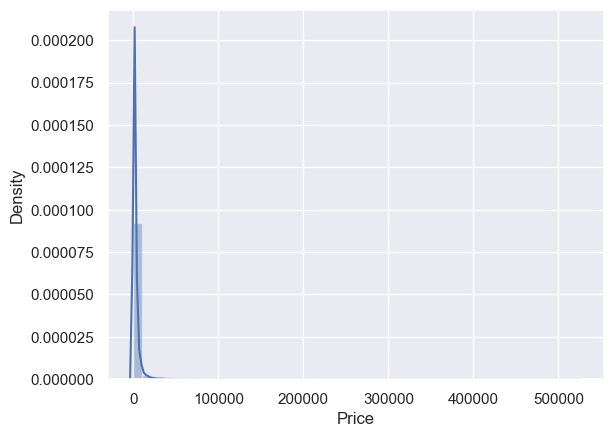

In [321]:
sns.distplot(df['Price'],hist=True);

In [323]:
df_price_mean = df['Price'].mean()
df_price_median = df['Price'].median()
print(df_price_mean,df_price_median)

2915.7168751558925 1203.38983


In [326]:
if df_price_mean > df_price_median:
    print('DATA is RIGHT SKEWED')
else:
    print('DATA is LEFT SKEWED')

DATA is RIGHT SKEWED


# Overview of Customer Orders

In [218]:
customers_orders_df = df.groupby('Customer',as_index=False)[['DocumentID']].count().sort_values(by='DocumentID')
customers_orders_df

,Customer,DocumentID
501,550,1
205,284,1
500,55,1
212,290,1
213,291,1
...,...,...
290,360,588
355,419,608
208,287,627
330,397,785


## Top 10 Customers with highest orders

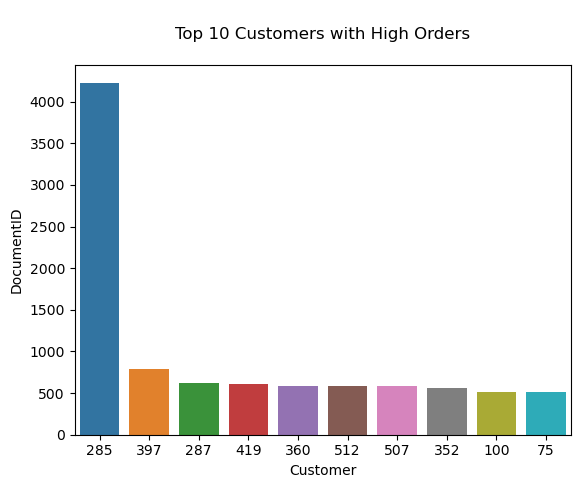

In [219]:
sns.barplot(data=(customers_orders_df.tail(10).sort_values(by='DocumentID',ascending=False)),x='Customer',y='DocumentID').set(
    title="\nTop 10 Customers with High Orders\n");

# RFM ---- Model

## R - Recency ( Recent Prchase by the customer)
## F - Frequency (Frequent orders placed by cutomer)
## M - Monetary (Amount spend on products by customer)

## Recency

In [232]:
max_date = df['Date'].max()
print(max_date)

2022-11-09


In [233]:
df_recency = df.groupby('Customer',as_index=False)['Date'].max()
df_recency.columns = ['Customer','Last_Purchase_Date']
df_recency.head()

,Customer,Last_Purchase_Date
0,1,2022-11-09
1,10,2019-11-11
2,100,2022-11-04
3,101,2020-04-28
4,102,2020-07-07


In [234]:
df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x : (max_date - x).days)
df_recency = df_recency.drop(['Last_Purchase_Date'],axis=1)
df_recency = df_recency.sort_values(by = 'Recency')
df_recency

,Customer,Recency
0,1,0
117,204,0
153,237,0
157,240,0
188,269,0
...,...,...
484,535,1390
159,242,1391
11,109,1392
603,97,1394


In [250]:
df_recency_last_3_months = df_recency[df_recency['Recency'] <= 90]
df_recency_last_3_6_months = df_recency[(df_recency['Recency'] > 90) & (df_recency['Recency'] <= 180)]
df_recency_morethan_6_months = df_recency[df_recency['Recency'] > 180]

data = [df_recency_last_3_months.shape[0],df_recency_last_3_6_months.shape[0],df_recency_morethan_6_months.shape[0]]
keys = ['Most_Recent_Customers','Medium_Recenct_Customers','Poor_Occurence_Customers']

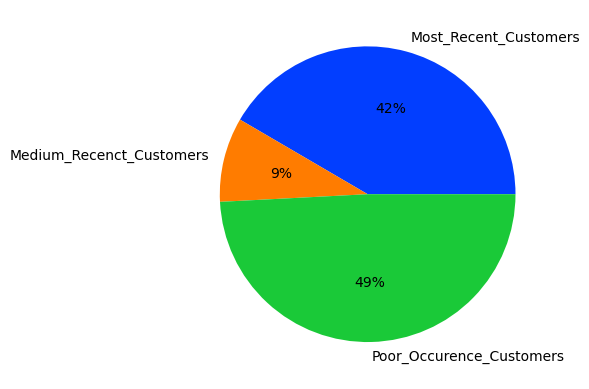

In [258]:
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
         autopct='%.0f%%')
  
# displaying chart
plt.show()

### Most_Recent_Customers = Customers with less than 90 days

### Medium_Recent_Customers = Customers with less than 180 days

### poor Occurence Customers = Customers ordered before 6 months

# Frequency

In [260]:
df_freq = df.drop_duplicates(subset=['Customer','DocumentID'], keep="first")

In [261]:
df_freq = df_freq.groupby('Customer',as_index=False)['DocumentID'].count()
df_freq.columns = ['Customer','Frequency']
df_freq = df_freq.sort_values(by = 'Frequency')
df_freq

,Customer,Frequency
414,472,1
488,539,1
489,54,1
220,298,1
219,297,1
...,...,...
281,352,394
459,512,450
330,397,456
453,507,482


## Frequency of customers

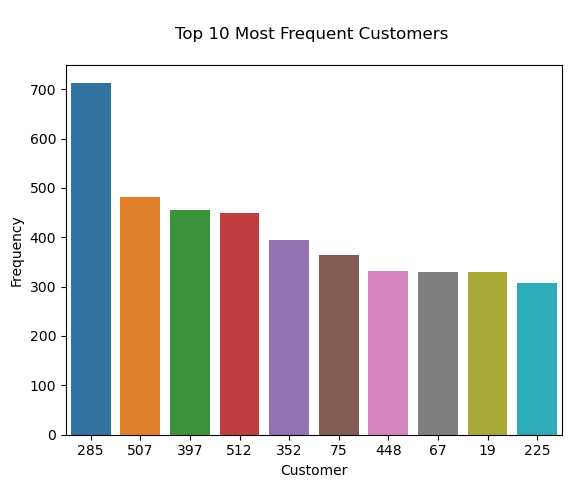

In [262]:
sns.barplot(data=(df_freq.tail(10).sort_values(by='Frequency',ascending=False)),x='Customer',y='Frequency').set(
    title="\nTop 10 Most Frequent Customers \n");

# Monetary

In [263]:
df_monetary = df.groupby('Customer',as_index=False)['Total_cost'].sum()
df_monetary.columns = ['Customer','Monetary']
df_monetary = df_monetary.sort_values(by='Monetary')
df_monetary.head()

,Customer,Monetary
247,321,18.432203
557,600,50.847458
229,305,73.754237
517,565,134.745763
578,74,135.600000


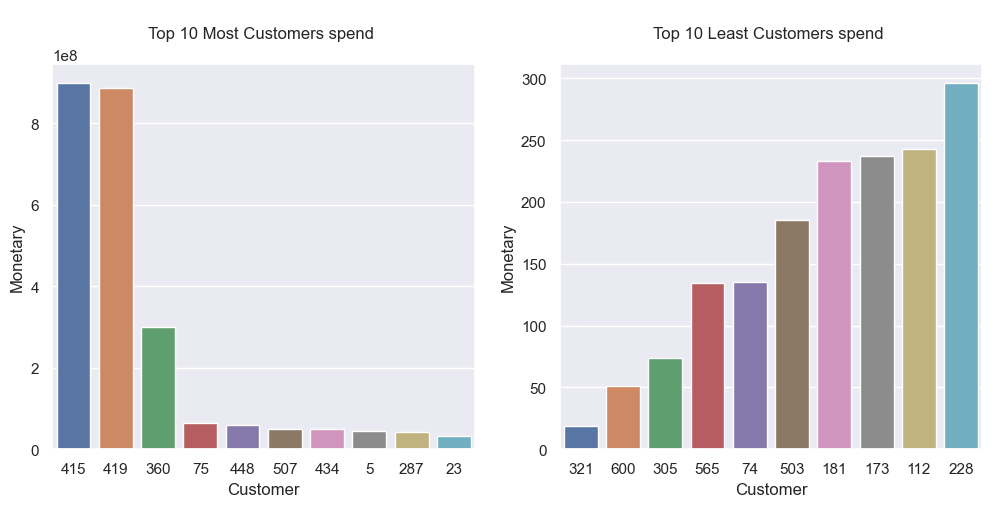

In [279]:
sns.set()

fig, axes = plt.subplots(1,2,figsize=(12, 5))

sns.barplot(data=(df_monetary.tail(10).sort_values(by='Monetary',ascending=False)),x='Customer',y='Monetary',ax=axes[0]).set(
    title="\nTop 10 Most Customers spend \n");
sns.barplot(data=(df_monetary.head(10).sort_values(by='Monetary',ascending=True)),x='Customer',y='Monetary',ax=axes[1]).set(
    title="\nTop 10 Least Customers spend \n");


## Merging Recency,frequency,Monetary with respect to CUSTOMER

In [150]:
RFM = df_recency.merge(df_freq,on='Customer').merge(df_monetary,on='Customer')
RFM

,Customer,Recency,Frequency,Monetary
0,1,0,16,3.783053e+05
1,2,599,71,7.880891e+05
2,3,61,21,1.971703e+05
3,4,10,2,5.261606e+03
4,5,13,34,4.511719e+07
...,...,...,...,...
601,602,93,2,5.031661e+05
602,603,989,3,7.394068e+03
603,604,7,61,4.154070e+06
604,605,295,218,2.656159e+06


## Normalizing Process

In [151]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

# K-Means Clustering Algorithm

### Centroid Based Algorith

### Unsupervised Learning method

### Groups Unlabelled data into Different Clusters

### Elbow method is used to find the clusters

## Using K-means algorithm for this dataset we can find that how our customers are ordering and spending money on your products by clusters

C:\Users\vimal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


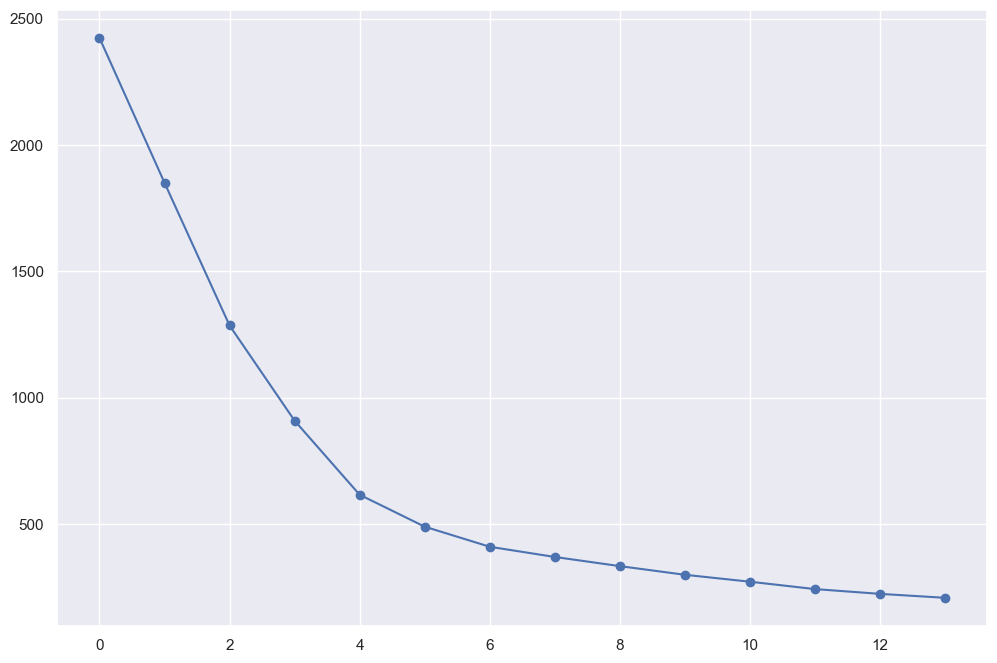

In [280]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o");

## From the above plot we can visually fix that cluster = 4

In [153]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [154]:
RFM

,Customer,Recency,Frequency,Monetary,Clusters
0,1,0,16,3.783053e+05,2
1,2,599,71,7.880891e+05,1
2,3,61,21,1.971703e+05,2
3,4,10,2,5.261606e+03,2
4,5,13,34,4.511719e+07,2
...,...,...,...,...,...
601,602,93,2,5.031661e+05,2
602,603,989,3,7.394068e+03,1
603,604,7,61,4.154070e+06,2
604,605,295,218,2.656159e+06,4


In [155]:
RFM['Clusters'].value_counts()

2    336
1    211
4     57
3      2
Name: Clusters, dtype: int64

## Analysing the performance of the customers using Clusters

In [281]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean().sort_values(by='Monetary')
final

C:\Users\vimal\AppData\Local\Temp\ipykernel_18592\773786111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean().sort_values(by='Monetary')


,Recency,Frequency,Monetary
Clusters,,,
1,1003.473934,4.862559,5.065868e+04
2,127.943452,21.931548,1.004568e+06
4,41.771930,233.298246,1.587943e+07
3,5.500000,101.000000,8.926627e+08


### From the above data we can able to find that 
### Cluster 3 = High Value Customers
### Cluster 4 = Above Average Customers
### Cluster 2 = Average Customers
### Cluster 1 = Low-value  Customers


In [282]:
def func(row):
    if row["Clusters"]==3:
        return 'High Value Customers'
    elif row["Clusters"]==4:
        return 'Above Average Customers'
    elif row["Clusters"]==2:
        return 'Average Customers'
    else:
        return 'Low-value Customers'

In [283]:
RFM['Customer_Status'] = RFM.apply(func,axis=1)
RFM

,Customer,Recency,Frequency,Monetary,Clusters,Customer_Status
0,1,0,16,3.783053e+05,2,Average Customers
1,2,599,71,7.880891e+05,1,Low-value Customers
2,3,61,21,1.971703e+05,2,Average Customers
3,4,10,2,5.261606e+03,2,Average Customers
4,5,13,34,4.511719e+07,2,Average Customers
...,...,...,...,...,...,...
601,602,93,2,5.031661e+05,2,Average Customers
602,603,989,3,7.394068e+03,1,Low-value Customers
603,604,7,61,4.154070e+06,2,Average Customers
604,605,295,218,2.656159e+06,4,Above Average Customers


## Customers Associated with clusters 

In [284]:
RFM['Customer_Status'].value_counts()

Average Customers          336
Low-value Customers        211
Above Average Customers     57
High Value Customers         2
Name: Customer_Status, dtype: int64

In [286]:
High_Value_Customers = RFM[RFM['Customer_Status']=='High Value Customers']
Above_Average_Customers = RFM[RFM['Customer_Status']=='Above Average Customers']
Average_Customers = RFM[RFM['Customer_Status']=='Average Customers']
Low_value_Customers = RFM[RFM['Customer_Status']=='Low-value Customers']


data = [High_Value_Customers.shape[0],Above_Average_Customers.shape[0],Average_Customers.shape[0],Low_value_Customers.shape[0]]
keys = ['High_Value_Customers','Above_Average_Customers','Average_Customers','Low_value_Customers']

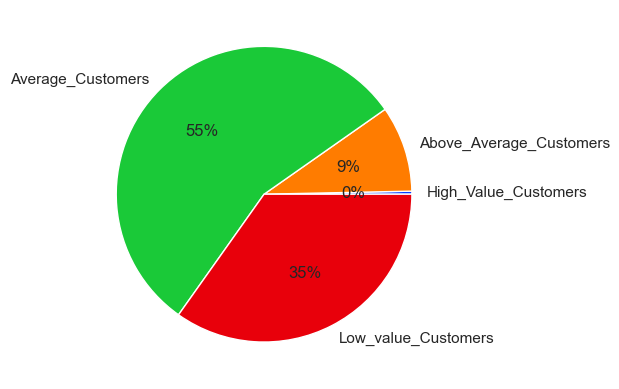

In [287]:
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
         autopct='%.0f%%')
  
# displaying chart
plt.show()

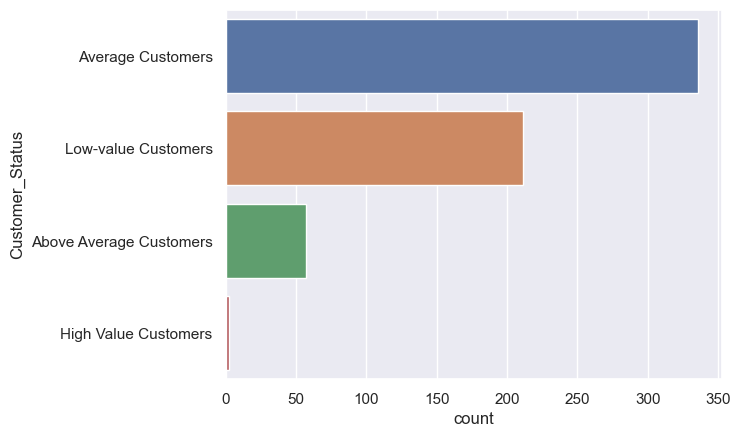

In [290]:
sns.countplot(y=RFM['Customer_Status']);

<AxesSubplot:>

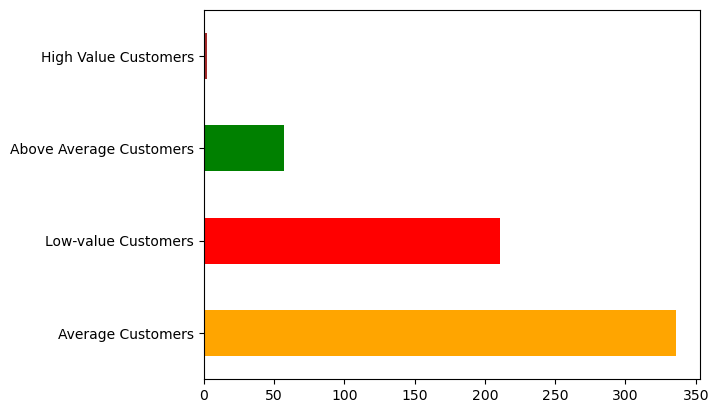

In [165]:
RFM['Customer_Status'].value_counts().plot(kind="barh", color=["Orange","Red","Green",'Brown'])


## Conclusion

### From the Above analysis from the graph we conclude that we have to concentrate for the low-value-customers which is having 35% of the customers(which is high number)